**Information:** *Basic concepts and simple examples of Probabilistic interpretation and Bayesian methods*

**Written by:** *Zihao Xu*

**Last update date:** *08.12.2021*

# Maximum Likelihood Estimation
## Motivation
In the chapter talking about ***Generalization and Regularization***, the concepts of parameter estimation, bias and variance are used to formally characterize notions of generalization, underfitting and overfitting. Here are some important remarks.

- View the parameter estimator $\hat{\boldsymbol{\theta}}$ as a **function** of the sampled training dataset $$\hat{\boldsymbol{\theta}}=g\left(\mathbf{x}^{(1)},\mathbf{x}^{(2)},\cdots,\mathbf{x}^{(m)}\right)$$


- The datasets (training, testing and probably validation) are generated by a **i.i.d.** probability distribution over datasets called the **data-generating process** (i.i.d. assumptions can be applied to almost all the common tasks)


- Assume that the true parameter value $\boldsymbol{\theta}$ is fixed but unknown


- Since the **data** is drawn from a **random process**, any function of the data is random, which means the parameter estimator $\hat{\boldsymbol{\theta}}$ is a **random variable**


The concepts of **bias** and **variance** are used to measure the performance of a parameter estimator. However, **for obtaining a good estimator**, it's not a good idea to guess that some function might make a good estimator and then to analyze its bias and variance. This motivated some principles from which specific functions that are good estimators for different models can be derived.

## Definition
- Consider a set of $m$ examples $\mathcal{D}=\left\{\mathbf{x}^{(1)},\mathbf{x}^{(2)},\cdots,\mathbf{x}^{(m)}\right\}$ drawn independently from the true but unknown data-generating distribution $p_{\text{data}}\left(\mathbf{x}\right)$. Let $p_{\text{model}}\left(\mathbf{x}|\boldsymbol{\theta}\right)$ be a parametric family of probability distributions over the same space indexed by $\boldsymbol{\theta}$
    - That is to say, $p_{\text{model}}$ maps any configuration $\mathbf{x}$ to a real number estimating the true probability $p_{\text{data}}(\mathbf{x})$


- Particularly, focus on the **likelihood** which is first introduced in the prerequisite chapter ***Probability Theory*** $$\mathbf{x}^{(1)},\cdots,\mathbf{x}^{(m)}\left|\ \boldsymbol{\theta}\right.\sim p_{\text{model}}\left(\mathbf{x}^{(1:m)}\left|\ \boldsymbol{\theta}\right.\right)$$ As a fast review, the likelihood tells us how *plausible* it is to observe $\mathbf{x}^{(1:m)}$ if we know the model parameters are $\mathbf{\theta}$


- Since the examples are assumed to be drawn **independently**, the likelihood can be factorized $$p_{\text{model}}\left(\mathbf{x}^{(1:m)}\left|\ \boldsymbol{\theta}\right.\right)=\underset{i=1}{\overset{m}{\Pi}}p_{\text{model}}\left(\mathbf{x}^{(i)}\left|\ \boldsymbol{\theta}\right.\right)$$ Then **maximum likelihood** estimator for $\boldsymbol{\theta}$ is then defined as $$\boldsymbol{\theta}_{\text{ML}}=\underset{\boldsymbol{\theta}}{\text{arg max}}\underset{i=1}{\overset{m}{\Pi}}p_{\text{model}}\left(\mathbf{x}^{(i)}\left|\ \boldsymbol{\theta}\right.\right)$$


- While this simple production may lead to a lot of inconveniences such as **numerical underflow**, taking the **logarithm** of the likelihood does not change the location for maximum ($\underset{\boldsymbol{\theta}}{\text{arg max}}$) but does conveniently transform a product into a sum $$\boldsymbol{\theta}_{\text{ML}}=\underset{\boldsymbol{\theta}}{\text{arg max}}\underset{i=1}{\overset{m}{\Sigma}}\text{log}p_{\text{model}}\left(\mathbf{x}^{(i)}\left|\ \boldsymbol{\theta}\right.\right)$$


- Obviously, rescaling the likelihood does not change the location for maximum ($\underset{\boldsymbol{\theta}}{\text{arg max}}$), we can divide by $m$ to obtain a version of the criterion that is expressed as an expectation with respect to the empirical distribution $\hat{p}_{\text{data}}$ defined by the training data $$\boldsymbol{\theta}_{\text{ML}}=\underset{\boldsymbol{\theta}}{\text{arg max}}\mathbb{E}_{\mathbf{x}\sim\hat{p}_{\text{data}}}\left[\text{log}p_{\text{model}}\left(\mathbf{x}\left|\ \boldsymbol{\theta}\right.\right)\right]$$


- The most **common** choice for the likelihood of a single measurement is to pick it to be **Gaussian**

## KL divergence
- Maximum likelihood estimation can be viewed as minimizing the dissimilarity between the empirical distribution $\hat{p}_{\text{data}}$, defined by the training set and the model distribution, with the degree of dissimilarity between the two measure by the **KL divergence** $$D_{\text{KL}}\left(\hat{p}_{\text{data}}\left\|p_{\text{model}}\right.\right)=\mathbb{E}_{\mathbf{x}\sim\hat{p}_{\text{data}}}\left[\text{log}\hat{p}_{\text{data}}\left(\mathbf{x}\right)-\text{log}p_{\text{model}}\left(\mathbf{x}\left|\ \boldsymbol{\theta}\right.\right)\right]$$ The term on the left is a function only of the data-generating process, not the model. This means when we train the model to minimize the KL divergence, we need only minimize $$-\mathbb{E}_{\mathbf{x}\sim\hat{p}_{\text{data}}}\left[\text{log}p_{\text{model}}\left(\mathbf{x}\left|\ \boldsymbol{\theta}\right.\right)\right]$$


- Minimizing this KL divergence corresponds exactly to minimizing the cross-entropy between the distributions. By definition, any loss consisting a negative log-likelihood is a **cross-entropy** between the **empirical distribution** defined by the training set ($\hat{p}_{\text{data}}$), and the **probability distribution** defined by the model ($p_{\text{model}}$)

## Conditional Log-Likelihood
- To apply *MLE* to most **supervised learning** tasks of predicting $\mathbf{y}$ given $\mathbf{x}$, the maximum likelihood estimator is generalized to estimate a conditional probability $p_{\text{model}}\left(\mathbf{y}\left|\ \mathbf{x},\boldsymbol{\theta}\right.\right)$


- Consider a set of $m$ examples $\mathcal{D}=\left\{\left(\mathbf{x}^{(1)},\mathbf{y}^{(1)}\right),\left(\mathbf{x}^{(2)},\mathbf{y}^{(2)}\right),\cdots,\left(\mathbf{x}^{(m)},\mathbf{y}^{(m)}\right)\right\}$ drawn independently from the true but unknown data-generating distribution $p_{\text{data}}\left(\mathbf{x},\mathbf{y}\right)$. Factorize the data-generating process $$p_{\text{data}}\left(\mathbf{x},\mathbf{y}\right)=p_{\text{data}}\left(\mathbf{y}\left|\ \mathbf{x}\right.\right)p_{\text{data}}\left(\mathbf{x}\right)$$ Let $p_{\text{model}}\left(\mathbf{x},\mathbf{y}|\ \boldsymbol{\theta}\right)$ be a parametric family of probability distributions over the same space indexed by $\boldsymbol{\theta}$. It also can be factorized $$p_{\text{model}}\left(\mathbf{x},\mathbf{y}|\ \boldsymbol{\theta}\right)=p_{\text{model}}\left(\mathbf{y}\left|\ \mathbf{x},\boldsymbol{\theta}\right.\right)p_{\text{data}}\left(\mathbf{x}\right)$$ Notice that the later part $p_{\text{data}}\left(\mathbf{x}\right)$ is **fixed and shared**, the maximum likelihood estimation is going to focus on $$p_{\text{model}}\left(\mathbf{y}\left|\ \mathbf{x},\boldsymbol{\theta}\right.\right)$$ Under the **i.i.d.** assumption, it can be decomposed into $$\boldsymbol{\theta}_{\text{ML}}=\underset{\boldsymbol{\theta}}{\text{arg max}}\underset{i=1}{\overset{m}{\Pi}}p_{\text{model}}\left(\mathbf{y}^{(i)}\left|\ \mathbf{x}^{(i)},\boldsymbol{\theta}\right.\right)$$ Similarly, this optimization problem is usually converted into a minimization problem by the **negative logarithm** operation considering computation issues $$\boldsymbol{\theta}_{\text{ML}}=\underset{\boldsymbol{\theta}}{\text{arg min}}\left[-\underset{i=1}{\overset{m}{\Sigma}}\text{log}\left[p_{\text{model}}\left(\mathbf{y}^{(i)}\left|\ \mathbf{x}^{(i)},\boldsymbol{\theta}\right.\right)\right]\right]$$

## Least Squares as Maximum Likelihood
- Least squares minimizing the mean square error is **equal** to maximum likelihood estimation when the likelihood is assigned to be **Gaussian**


- Assume the model is $\hat{y}=f(\mathbf{x};\boldsymbol{\theta})$ with the dataset $$\mathbf{X}=\begin{bmatrix}\mathbf{x}^{(1)} & \mathbf{x}^{(2)} & \cdots & \mathbf{x}^{(m)}\end{bmatrix},\mathbf{y}=\begin{bmatrix}y^{(1)} & y^{(2)} & \cdots & y^{(m)}\end{bmatrix}$$ The solution for $\boldsymbol{\theta}$ via least squares would be $$\boldsymbol{\theta}_{\text{LS}}=\underset{\boldsymbol{\theta}}{\text{arg min}}\left\|\mathbf{y}-f\left(\mathbf{X};\boldsymbol{\theta}\right)\right\|^2_2$$


- From the point of view of maximum likelihood estimation, think of the model as producing a conditional distribution $p_{\text{model}}\left(y\left|\ \mathbf{x},\boldsymbol{\theta}\right.\right)$ instead of producing a single prediction $\hat{y}=f(\mathbf{x};\boldsymbol{\theta})$. Assign this likelihood of a single measurement to be Gaussian $$p_{\text{model}}\left(y^{(i)}\left|\ \mathbf{x}^{(i)},\boldsymbol{\theta},\sigma\right.\right)=\mathcal{N}\left(y^{(i)}\left|f(\mathbf{x}^{(i)};\boldsymbol{\theta}),\sigma^2\right.\right)$$ where $\sigma$ models the **noise**. This correspond to the belief that the measurement is around the model prediction $f(\mathbf{x};\boldsymbol{\theta})$ but it is contained with Gaussian noise of variance $\sigma^2$. For all the data, we have $$\begin{aligned}p_{\text{model}}\left(\mathbf{y}\left|\ \mathbf{X},\boldsymbol{\theta},\sigma\right.\right)&=\mathcal{N}\left(\mathbf{y}\left|f\left(\mathbf{X};\boldsymbol{\theta}\right),\sigma^2\mathbf{I}_m\right.\right)\\&=(2\pi)^{-m/2}\sigma^{-m}\text{exp}\left(-\frac{1}{2\sigma^2}\left\|\mathbf{y}-f\left(\mathbf{X};\boldsymbol{\theta}\right)\right\|^2_2\right)\end{aligned}$$ Then we have the maximum likelihood estimation to be $$\begin{aligned}\boldsymbol{\theta}_{\text{ML}}&=\underset{\boldsymbol{\theta}}{\text{arg min}}\left[-\text{log}\left[p_{\text{model}}\left(\mathbf{y}\left|\ \mathbf{X},\boldsymbol{\theta},\sigma\right.\right)\right]\right]\\&=\underset{\boldsymbol{\theta}}{\text{arg min}}\left[\frac{m}{2}\text{log}\left(2\pi\right)+m\text{log}(\sigma)+\frac{1}{2\sigma^2}\left\|\mathbf{y}-f\left(\mathbf{X};\boldsymbol{\theta}\right)\right\|^2_2\right]\\&=\underset{\boldsymbol{\theta}}{\text{arg min}}\left\|\mathbf{y}-f\left(\mathbf{X};\boldsymbol{\theta}\right)\right\|^2_2\\&=\boldsymbol{\theta}_{\text{LS}}\end{aligned}$$ Maximizing the likelihood with respect to $\boldsymbol{\theta}$ yields the same estimate as minimizing the squared error.


- The two criteria have **different values** but the **same location of the optimum**, which justifies the use of the LS as a maximum likelihood estimation procedure.


- Notice that $\sigma$ is also a parameter to be optimized, maximize the likelihood with respect to $\sigma$ $$\begin{aligned}\sigma_{\text{ML}}&=\underset{\sigma}{\text{arg min}}\left[-\text{log}\left[p_{\text{model}}\left(\mathbf{y}\left|\ \mathbf{X},\boldsymbol{\theta},\sigma\right.\right)\right]\right]\\&=\underset{\sigma}{\text{arg min}}\left[\frac{m}{2}\text{log}\left(2\pi\right)+m\text{log}(\sigma)+\frac{1}{2\sigma^2}\left\|\mathbf{y}-f\left(\mathbf{X};\boldsymbol{\theta}\right)\right\|^2_2\right]\\&=\underset{\sigma}{\text{arg min}}\left[m\text{log}(\sigma)+\frac{1}{2\sigma^2}\left\|\mathbf{y}-f\left(\mathbf{X};\boldsymbol{\theta}\right)\right\|^2_2\right]\end{aligned}$$ It can be easily solved by setting the derivative with respect to $\sigma$ to zero $$\begin{aligned}m\frac{1}{\sigma_{\text{ML}}}-\frac{1}{\sigma_{\text{ML}}^3}\left\|\mathbf{y}-f\left(\mathbf{X};\boldsymbol{\theta}\right)\right\|^2_2&=0\\m\sigma_{\text{ML}}^2-\left\|\mathbf{y}-f\left(\mathbf{X};\boldsymbol{\theta}\right)\right\|^2_2&=0\\ \sigma_{\text{ML}}^2&=\frac{1}{m}\left\|\mathbf{y}-f\left(\mathbf{X};\boldsymbol{\theta}\right)\right\|^2_2\end{aligned}$$


- With the maximum likelihood estimation $\boldsymbol{\theta}_{\text{ML}},\sigma_{\text{ML}}$, we can make **predictions** about $y$ at a new point $\mathbf{x}$ $$p\left(y\left|\mathbf{x},\boldsymbol{\theta}_{\text{ML}},\sigma_{\text{ML}}\right.\right)=\mathcal{N}\left(y\left|f(\mathbf{x};\boldsymbol{\theta}_{\text{ML}}),\sigma^2_{\text{ML}}\right.\right)$$ This means we're able to measure the **noise** occurred in sampling.

## Properties of Maximum Likelihood Estimation
- Maximum likelihood estimator can be shown to be the **best** estimator asymptotically as the number of examples $m\rightarrow\infty$, in terms of its rate of convergence as $m$ increases


- Whenever the **cross-entropy loss** or **least squares method** (e.g. MSE loss) is used, it can be viewed as computing the maximum likelihood estimate.


- Under appropriate conditions, the maximum likelihood estimator has the property of **consistency**
    - *Consistency*: **Unbiased**, converge to the true parameters as $m\rightarrow\infty$
    - The true distribution $p_{\text{data}}$ must lie within the model family $p_{\text{model}}$
    - The true distribution $p_{\text{data}}$ must correspond to exactly one value of $\boldsymbol{\theta}$


- The **statistical efficiency**, meaning that one consistent estimator may obtain lower generalization error for a fixed number of samples $m$, of the maximum likelihood estimator is very high among consistent estimators
    - It is asymptotically efficient, which means it achieves the Cramer Rao bound asymptotically


- It's mostly used when there is plenty of data
    - Tends to overfit when there is not enough data

%%\latex
\newpage

# Linear Regression via Maximum Likelihood Estimation
Here is a simple example showing how to apply **Maximum Likelihood Estimation** to linear regression and the correspondence between likelihood and least squares


## Generate the dataset
The synthetic dataset is generated from
$$
y_i=-0.5+2x_i+2x_i^2+0.1\epsilon_i
$$
where $\epsilon_i\sim\mathcal{N}(0,1)$ and we sample $x_i\sim U([0,1])$.

First generate this synthetic dataset and visualize the samples.

In [1]:
# Necessary modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure reproducibility
np.random.seed(1234)
# Plot setting
sns.set()
sns.set_context('paper')

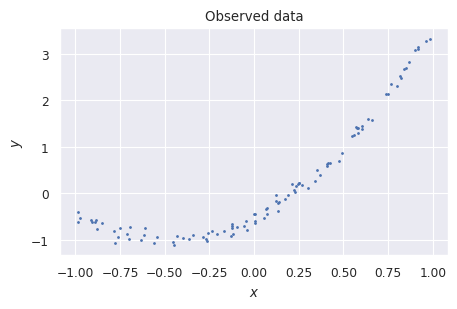

In [2]:
# Number of observations
num_obs = 100
# Sample x
x = (-1.0 + 2 * np.random.rand(num_obs)).reshape(-1, 1)
# True parameters
theta = np.array([-0.5, 2.0, 2.0]).reshape(-1, 1)
sigma = 0.1
# Calculate the corresponding y
y = theta[0] + theta[1] * x + theta[2] * x**2 \
    + sigma * np.random.randn(num_obs).reshape(-1, 1)
# Visualize the dataset
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(x, y, '.', markersize=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Observed data')
plt.show()

## Build the model and train
As mentioned above, with setting the likelihood to be Gaussian, linear regression via least squares is a part of the procedure of maximum likelihood estimation.
$$\boldsymbol{\theta}_{\text{ML}}=\boldsymbol{\theta}_{\text{LS}}$$
Therefore, first get the values of the parameters via least squares. For convenience, here the solutions are got with the help of **``Scikit-Learn``**. 


In this case, assume we know the exact degree of the polynomial so that we're not going to worry about validation and generalization issues, which makes us focusing on the MLE part. In the meantime, the dataset is not divided into training and validation dataset.

In [3]:
# Scikit-Learn Packages
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
# 'include_bias' and 'fir_intercept' cannot be both true
# Select one to be true according to personal preferrence
estimator = make_pipeline(PolynomialFeatures(2,include_bias=True),\
LinearRegression(fit_intercept=False))
# Train the model
estimator.fit(x,y)
# Compare the values
print("The true parameters are:\t",theta.T[0])
print("The estimated parameters are:\t",estimator[1].coef_[0])

The true parameters are:	 [-0.5  2.   2. ]
The estimated parameters are:	 [-0.52407683  1.99641392  2.08372088]


## Estimate the noise variance
In maximum likelihood estimation, one important thing is to also estimate the variance by maximizing the likelihood. Mention that the likelihood is set to be Gaussian, the variance should be
$$\sigma_{\text{ML}}^2=\frac{1}{m}\left\|\mathbf{y}-f\left(\mathbf{X};\boldsymbol{\theta}\right)\right\|^2_2$$

In [4]:
# Get the predictions of the trained model
y_pred = estimator.predict(x).reshape(-1,1)
# Calculate the estimated variance
sigma2_MLE = np.sum((y_pred-y)**2)/y.shape[0]
sigma_MLE = np.sqrt(sigma2_MLE)
# Compare the  values
print("True sigma = %1.4f"%sigma)
print("MLE  sigma = %1.4f"%sigma_MLE)

True sigma = 0.1000
MLE  sigma = 0.0928


## Make predictions
Now we have the maximum likelihood estimation $\boldsymbol{\theta}_{\text{ML}},\sigma_{\text{ML}}$, we can make **predictions** about $y$ at a new point $\mathbf{x}$
$$p\left(y\left|\mathbf{x},\boldsymbol{\theta}_{\text{ML}},\sigma_{\text{ML}}\right.\right)=\mathcal{N}\left(y\left|f(\mathbf{x};\boldsymbol{\theta}_{\text{ML}}),\sigma^2_{\text{ML}}\right.\right)$$
Let's visualize the $95\%$ credible interval $$(f(\mathbf{x};\boldsymbol{\theta}_{\text{ML}})-1.96\sigma_{\text{ML}},f(\mathbf{x};\boldsymbol{\theta}_{\text{ML}})+1.96\sigma_{\text{ML}})$$

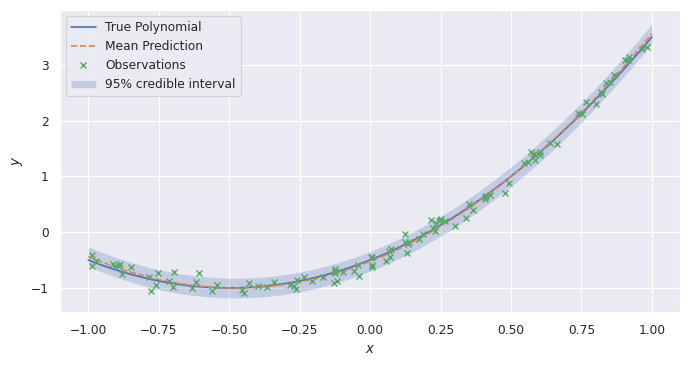

In [5]:
fig, ax = plt.subplots(figsize=(8,4),dpi=100)
# Points to be estimated
xe = np.linspace(-1,1,100)
# Predictions and true values
ye_pred = estimator.predict(xe.reshape(-1,1)).reshape(-1)
ye_true = theta[0] + theta[1] * xe + theta[2] * xe**2
# Lower bound and upper bound
ye_pred_lb = ye_pred - 1.96 * sigma_MLE
ye_pred_ub = ye_pred + 1.96 * sigma_MLE
# True polynomial
ax.plot(xe,ye_true,label='True Polynomial')
# Mean prediction
ax.plot(xe,ye_pred,'--',label='Mean Prediction')
# 95% credible interval
ax.fill_between(xe,ye_pred_lb,ye_pred_ub,alpha=0.25,label='95% credible interval')
# Observations
ax.plot(x,y,'x',label='Observations')
# Labels
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='upper left')
plt.show()

%%latex
\newpage

# Bayesian methods

## Frequentist approach
- Review: In frequentist view, when we say that an outcome has a probability $p$ of occurring, it means that if we repeated the experiment infinite times, then a proportion $p$ of the repetitions would result in that outcome


- The true parameter value $\boldsymbol{\theta}$ is supposed to be **fixed but unknown**


- The point estimate $\hat{\boldsymbol{\theta}}$ is a random variable on account of it being a function of the dataset, which is seen as random


- Predictions are made based on estimating a single value of $\boldsymbol{\theta}$


- Addresses the uncertainty in a given point estimate of $\boldsymbol{\theta}$ by evaluating its variance
    - The variance is an assessment of how the estimate might change with alternative samplings of the observed data


- **Maximum Likelihood Estimation** is a Frequentist approach

## Bayesian Estimation
- Review: Bayesian uses the probability to reflect **degrees of certainty** in states of knowledge


- The true parameter $\boldsymbol{\theta}$ is unknown or uncertain and thus is represented as a **random variable**. Before observing the data, represent our knowledge of $\boldsymbol{\theta}$ using the **prior probability distribution** $p(\boldsymbol{\theta})$
    - Typically selects  prior distribution that is quite broad (e.g. maximum entropy) to reflect a high degree of uncertainty in the value of $\boldsymbol{\theta}$  before observing any data


- The dataset is directly observed and so is not random. Consider a set of data examples $\left\{\mathbf{x}^{(1)},\cdots,\mathbf{x}^{(m)}\right\}$, we can recover the effect of data on our belief about $\boldsymbol{\theta}$ via Bayes' rule $$p\left(\boldsymbol{\theta}\left|\ \mathbf{x}^{(1)},\cdots,\mathbf{x}^{(m)}\right.\right)=\frac{p\left(\mathbf{x}^{(1)},\cdots,\mathbf{x}^{(m)}\left|\ \boldsymbol{\theta}\right.\right)p(\boldsymbol{\theta})}{p\left(\mathbf{x}^{(1)},\cdots,\mathbf{x}^{(m)}\right)}$$ In the scenarios where Bayesian estimation is typically used, the prior begins as a relatively uniform or Gaussian distribution with high entropy, and the observation of the data usually causes the posterior to lose entropy and concentrate around a few highly likely values of the parameters


- Bayesian approach makes predictions using a full distance over $\boldsymbol{\theta}$. After observing $m$ examples, the predicted distribution over the next data sample $\mathbf{x}^{(m+1)}$ is given by $$p\left(\mathbf{x}^{(m+1)}\left|\ \mathbf{x}^{(1)},\cdots,\mathbf{x}^{(m)}\right.\right)=\int p\left(\mathbf{x}^{(m+1)}\left|\ \boldsymbol{\theta}\right.\right)p\left(\boldsymbol{\theta}\left|\ \mathbf{x}^{(1)},\cdots,\mathbf{x}^{(m)}\right.\right)$$ Each value of $\boldsymbol{\theta}$ with positive probability density contributes to the prediction of the next example, with the contribution weighted by the posterior density itself.
    - Enable us to quantify the **epistemic uncertainty** induced by the limited number of observations used to estimate the weights
    
    
- The Bayesian prior distribution has an influence by shifting probability mass density towards regions of the parameter space that are preferred a priori.
    - In practice, the prior often expresses a **preference for models that are simpler** or more smooth.
    - This naturally arose **regularization** effect tends to protect well against overfitting.
    
    
- Bayesian methods typically generalize much better when limited training data is available but typically suffer from high computational cost when the number of training examples is large.


- Similarly, for **supervised learning** tasks, use the **conditional likelihood** instead.

## Bayesian vs Frequentist Estimation
### Frequentist Estimation
- Usually used for parameter estimation


- Typically low-bias high-variance estimates


- Most appropriate when the
    - prior information is weak
    - amount of data is large
    - quality of data is high

### Bayesian Estimation
- Usually used for Machine Learning inference


- Typically high-bias low-variance estimates


- Most appropriate when the
    - prior information is strong
    - amount of data is small
    - quality of data is poor

## Maximum A Posterior Estimation
- While most operations involving the Bayesian posterior for most interesting models are **intractable**, a point estimate offers **a tractable approximation**


- **Maximum A Posterior** point estimate benefits from the Bayesian approach by **allowing the prior to influence the choice of the point estimate** rather than simply returning to the maximum likelihood estimate.


- The **MAP** estimate chooses the point of maximal posterior probability (or maximal probability density in the more common case of continuous $\boldsymbol{\theta}$) $$\boldsymbol{\theta}_{\text{MAP}}=\underset{\boldsymbol{\theta}}{\text{arg max}}p\left(\boldsymbol{\theta}\left|\ \mathbf{x}^{(1)},\cdots,\mathbf{x}^{(m)}\right.\right)=\underset{\boldsymbol{\theta}}{\text{arg max}}\left\{\text{log}p\left(\mathbf{x}^{(1)},\cdots,\mathbf{x}^{(m)}\left|\ \boldsymbol{\theta}\right.\right)+\text{log}p(\boldsymbol{\theta})\right\}$$ On the righthand side, $p\left(\mathbf{x}^{(1)},\cdots,\mathbf{x}^{(m)}\left|\ \boldsymbol{\theta}\right.\right)$ is the standard likelihood tern and $p(\boldsymbol{\theta})$ is the prior distribution
    - Reduce the bias at the price of increased bias (in comparison to the ML estimate)


- Many **regularized estimation strategies** can be interpreted as making the MAP approximation to Bayesian inference. This view applies when the regularization consists of **adding an extra term** to the objective function that corresponds to $p(\boldsymbol{\theta})$
    - Maximum likelihood learning regularized with weight decay

%%latex
\newpage

# Bayesian methods example

## Linear Regression via Bayesian Estimation

### Mathematical Representation

**Linear Model**

Assume the model is $\hat{y}=f(\mathbf{x};\boldsymbol{\theta})$ with the dataset 
$$
\mathbf{X}=\begin{bmatrix}\mathbf{x}^{(1)} & \mathbf{x}^{(2)} & \cdots & \mathbf{x}^{(m)}\end{bmatrix},\mathbf{y}=\begin{bmatrix}y^{(1)} & y^{(2)} & \cdots & y^{(m)}\end{bmatrix}
$$
In the case of linear regression, some **fixed** features are used to model the data
$$\hat{y}=\sum_{j=1}^{n}\theta_j\phi_j(\mathbf{x})=\boldsymbol{\theta}^T\boldsymbol{\phi}(\mathbf{x})$$




**Likelihood**

Similar to what is did in MLE, assign the **likelihood** of a single measurement to be Gaussian, where $\sigma$ models the **measurement noise**
$$
p\left(y^{(i)}\left|\ \mathbf{x}^{(i)},\boldsymbol{\theta},\sigma\right.\right)=\mathcal{N}\left(y^{(i)}\left|\ \boldsymbol{\theta}^T\boldsymbol{\phi}(\mathbf{x}^{(i)}),\sigma^2\right.\right)
$$
Given that the measurements are made independently, for all the data
$$
p\left(\mathbf{y}\left|\ \mathbf{X},\boldsymbol{\theta},\sigma\right.\right)=\mathcal{N}\left(\mathbf{y}\left|\ \boldsymbol{\theta}^T\boldsymbol{\phi}(\mathbf{X}),\sigma^2\mathbf{I}_m\right.\right)=(2\pi)^{-m/2}\sigma^{-m}\text{exp}\left(-\frac{1}{2\sigma^2}\left\|\mathbf{y}-\boldsymbol{\theta}^T\boldsymbol{\phi}(\mathbf{x})\right\|^2_2\right)
$$




**Prior**

In Bayesian methods, the **uncertainty in the model parameters** is modeled using a **prior**
$$
\boldsymbol{\theta}\sim p(\boldsymbol{\theta})
$$
The **simplest** possible choice for the parameters are the **Gaussian prior** with a **precision** of $\alpha$
$$
p(\boldsymbol{\theta}|\alpha)=\mathcal{N}\left(\boldsymbol{\theta}\left|\ \mathbf{0},\alpha^{-1}\mathbf{I}_n\right.\right)=(2\pi)^{-n/2}\alpha^{n/2}\text{exp}\left(-\frac{\alpha}{2}\left\|\boldsymbol{\theta}\right\|^2_2\right)
$$
This shows the **belief** that $\boldsymbol{\theta}$ must be **around zero** with a precision of $\alpha$ before seeing any data. The bigger the precision parameter $\alpha$ is, the more the parameters $\boldsymbol{\theta}$ are pushed towards zero, which can be viewed as a kind of regularization.




**Posterior**

Combining the likelihood and the prior, get the **posterior** using Bayes' rule
$$
p\left(\boldsymbol{\theta}\left|\ \mathbf{X},\mathbf{y},\sigma,\alpha\right.\right)=\frac{p\left(\mathbf{y}\left|\ \mathbf{X},\boldsymbol{\theta},\sigma\right.\right)p(\boldsymbol{\theta}|\alpha)}{\int{p\left(\mathbf{y}\left|\ \mathbf{X},\boldsymbol{\theta}',\sigma\right.\right)p(\boldsymbol{\theta}'|\alpha)}d\boldsymbol{\theta}'}
$$
This posterior stands for the **states of knowledge about** $\boldsymbol{\theta}$ **after seeing the data**, if $\alpha$ and $\sigma$ are known. Given that the likelihood and prior are both Gaussian, the posterior is also Gaussian
$$
p\left(\boldsymbol{\theta}\left|\ \mathbf{X},\mathbf{y},\sigma,\alpha\right.\right)=\mathcal{N}(\boldsymbol{\theta}|\mathbf{m},\mathbf{S})
$$
where
$$
\mathbf{S}=\left(\sigma^{-2}\boldsymbol{\Phi}^T\boldsymbol{\Phi}+\alpha\mathbf{I}_n\right)^{-1},\ \mathbf{m}=\sigma^{-2}\mathbf{S}\boldsymbol{\Phi}^T\mathbf{y}
$$
In the general case of non-Gaussian likelihood and non-linear models, the posterior will not be analytically available.




**Posterior Predictive Distribution**

With the posterior, the **predictive distribution** for $y$ at a new $\mathbf{x}$ is available by using the **sum rule**
$$
p()
$$